In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset
from pathlib import Path
import hvplot.pandas
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [68]:
dataset = pd.read_csv("listings.csv")
dataset.head(15)
df = dataset.head(15)
print(df)

        id                                              name  host_id  \
0   329172               Hillside designer home,10 min.dwntn  1680871   
1   329306            Urban Homestead, 5 minutes to downtown   880571   
2   331549                    One Room with Private Bathroom  1690383   
3   333815                     Solar Sanctuary - Austin Room   372962   
4   333442                        Rare Secluded 1940s Estate  1698318   
5   335885  4Bed/2Bath Sleeps 12+ w Pool, Sauna, Gym & Games  1707903   
6   334616                 Great SXSW East Central Apartment   608539   
7   337125                 1800 Sq ft, 3-2 home in NW Austin   261883   
8   340045                       Greenbelt Professional Loft  1725752   
9   335945   The Sheridan- A comfy and spacious Austin Oasis  1555683   
10  340630               2 Bedroom duplex for monthly rental   531267   
11  341596                         South Austin Ultra Modern  1733004   
12  341382               SXSW | 4 bedroom home near

In [69]:
## Based on this chart, it can be seen that 9 out of the 15 booked rooms are Entire homes/Apts. This can conclude that Private rooms are less lkely to get booked. 

In [70]:
sorted_data = df.sort_values(by='price', ascending=True)
print(sorted_data.head(15))

        id                                              name  host_id  \
13  342243       Spacious Private Master Suite by the Month.  1736662   
10  340630               2 Bedroom duplex for monthly rental   531267   
1   329306            Urban Homestead, 5 minutes to downtown   880571   
7   337125                 1800 Sq ft, 3-2 home in NW Austin   261883   
2   331549                    One Room with Private Bathroom  1690383   
3   333815                     Solar Sanctuary - Austin Room   372962   
14  342039       Garden Guesthouse, central East Austin gem.  1735494   
11  341596                         South Austin Ultra Modern  1733004   
9   335945   The Sheridan- A comfy and spacious Austin Oasis  1555683   
6   334616                 Great SXSW East Central Apartment   608539   
4   333442                        Rare Secluded 1940s Estate  1698318   
5   335885  4Bed/2Bath Sleeps 12+ w Pool, Sauna, Gym & Games  1707903   
8   340045                       Greenbelt Professi

In [71]:
# The price for a private room ranges significantly less compared to that of an entire home/apt which is expected.

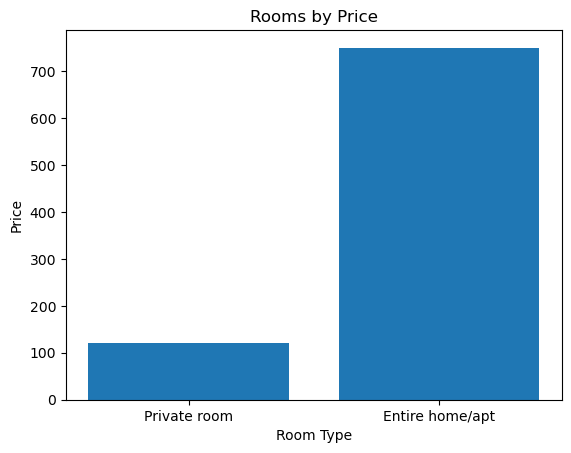

In [72]:
sorted_df = pd.DataFrame(sorted_data)

# Select the columns you want to plot
x = sorted_df['room_type']
y = sorted_df['price']

# Create a line plot
plt.bar(x, y)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Rooms by Price')
plt.show()

In [65]:

low_price = 40
high_price = 800

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
sorted_data['room_type'] = sorted_data['price'].rolling(window=low_price).mean()
sorted_data['minimum_nights'] = sorted_data['price'].rolling(window=high_price).mean()

sorted_data = sorted_data.dropna()

# Review the DataFrame
display(sorted_data.head())


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


In [47]:
sorted_df = pd.DataFrame(sorted_data)
sorted_array = sorted_df.values
sorted_data['name'] = pd.to_numeric(sorted_data['name'], errors='coerce')

num_clusters = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(sorted_array)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the clustered data
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(data[cluster_labels == i][:, 0], data[cluster_labels == i][:, 1], label=f'Cluster {i + 1}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'Spacious Private Master Suite by the Month.'

In [30]:
ph_prices = [45, 63, 80, 100, 102, 120]
avg_ph_prices = sum(ph_prices) / len(ph_prices)
print("Average:", avg_ph_prices )

Average: 85.0


In [40]:
eh_prices = [50, 116, 221, 250, 300, 400, 495, 750]
avg_eh_prices = sum(eh_prices) / len(eh_prices)
print("Average:", avg_eh_prices )

Average: 322.75


In [7]:
#Remove unwated aspects
dataset.drop(['neighbourhood_group', 'license', ], axis = 1, inplace = True)

In [11]:
print(dataset.drop)

<bound method DataFrame.drop of                        id                                         name  \
0                  329172          Hillside designer home,10 min.dwntn   
1                  329306       Urban Homestead, 5 minutes to downtown   
2                  331549               One Room with Private Bathroom   
3                  333815                Solar Sanctuary - Austin Room   
4                  333442                   Rare Secluded 1940s Estate   
...                   ...                                          ...   
13803  775205162431032890  Downtown Austin Pied de Terre, cute studio!   
13804  775306960895705604                   Bedroom W/ Shared Bathroom   
13805  775358125921423628                                    Creek Zen   
13806  775373038956495432              The Flamingo - 1/1 pink retreat   
13807  775388786567166120                  Majic School Bus / Schoolie   

         host_id host_name  neighbourhood   latitude  longitude  \
0        168

In [54]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame()

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['room_type'] = y_test

# Add the strategy returns to the DataFrame
predictions_df['price'] = predictions_df['Predicted'] * predictions_df['Actual Returns']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

NameError: name 'svm_pred' is not defined